<a href="https://colab.research.google.com/github/theorignalmapdcodex/aipi590_i-4_et2/blob/main/notebooks/pdp%2Bice%2Bale_plot_interpretation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

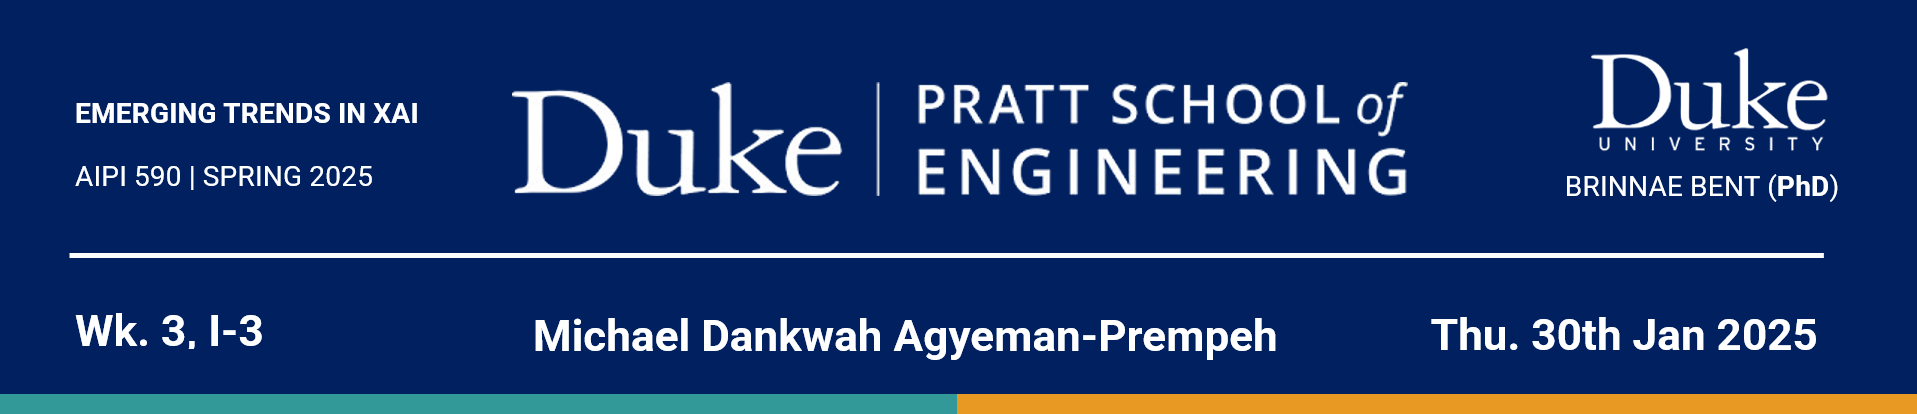
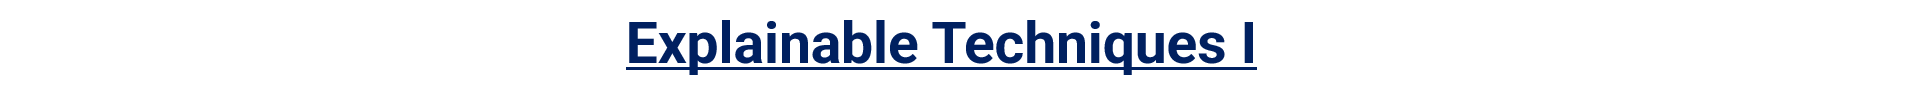

Will continue tomorrow!

>#### 🔗 **1. GitHub Links:**
- Click [here](https://github.com/theorignalmapdcodex/aipi590_i-3_et1/blob/main/notebooks/bert_local_interpretability_v3.ipynb) to access the *GitHub repository ipynb* file for this assignment.

## 🥅 **Project Goal:**
### *To utilize SHAP to identify and visualize the influence of specific words and phrases within paragraph-length text on GPT-2's generation of biased or unbiased outputs related to nationality. This analysis will help us understand and potentially mitigate gender biases present in the model's learned representations and generated text.*

<br>

---

<br>

- ### **Why GPT-2 as model of choice for text prediction and not BERT for example:**
The choice between GPT-2 and BERT for text prediction depends heavily on the specific definition of "text prediction" and the nuances of the task. If the goal is open-ended generation or if the focus is on generating plausible text rather than just identifying the most likely option, GPT-2 is often a more natural and effective choice. If the task is more about understanding relationships between words or if high accuracy in selecting from a set of options is paramount, then BERT or a BERT-derived model might be more suitable. It's crucial to consider the strengths of each model and how they align with the specific requirements of the text prediction task at hand.


<mark>Gemini AI supported my idea from the reading</mark> I did [here](https://huggingface.co/docs/transformers/model_doc/gpt2) and [here](https://huggingface.co/docs/transformers/model_doc/bert) as well.

--------------------------------------------------------------------------------

In [22]:
# To ignore warnings for code output to look clean
import warnings
warnings.filterwarnings("ignore")

In [23]:
# import os

# # Remove Colab default sample_data
# !rm -r ./sample_data

# # Clone GitHub files to colab workspace
# repo_name = "aipi590_i-4_et2"
# git_path = 'https://github.com/theorignalmapdcodex/aipi590_i-4_et2.git' # Change to your path
# !git clone "{git_path}"

# # Change working directory to location of notebook
# notebook_dir = 'notebooks'
# path_to_notebook = os.path.join(repo_name,notebook_dir)
# %cd "{path_to_notebook}"
# %ls

## 📚 **I. Libraries & Packages Installation**

In [24]:
# !pip install transformers shap

In [25]:
# #1 Importing for usage of SHAP and GPT-2
# from transformers import AutoModelForCausalLM, AutoTokenizer
# import torch
# import numpy as np
# import shap

## ⚙️ **III. Setting Up Functions to Predict/Score and Visuialize**

In [26]:
# def get_shapvalues_from_text(text):
#     """
#     Generates and returns SHAP values for a given text.
#     """
#     explainer = shap.Explainer(model, tokenizer)
#     shap_values = explainer(text)
#     return shap_values

# def predict_and_visualize(shap_values):
#     """
#     Visualizes SHAP values for a given text and displays the SHAP text plot.
#     """
#     plot_text = shap.plots.text(shap_values)
#     return plot_text

## 💻 **IV. Initializing GPT-2 and setting up process required to tokenize text**

In [27]:
# # Load pre-trained GPT-2 tokenizer and model
# tokenizer = AutoTokenizer.from_pretrained("gpt2", use_fast=True)
# model = AutoModelForCausalLM.from_pretrained("gpt2")

In [28]:
# # Setting model decoder to true
# model.config.is_decoder = True
# # Setting text-generation params under task_specific_params
# model.config.task_specific_params["text-generation"] = {
#     "do_sample": True,
#     "max_length": 50,
#     "temperature": 0.7,
#     "top_k": 50,
#     "no_repeat_ngram_size": 2,
# }

## ✨ **V. Trying to Analyze Bias in Nationality Based-Perception of GPT-2 model with SHAP values**

In [29]:
#                 #---- Other sentences to test with ----#
# # firsttext_to_analyse = ["A doctor was examining a patient and later complained of pain in."]
# # secondtext_to_analyse = ["A nurse was examining a patient and later complained of pain in."]

# # firsttext_to_analyse = ["A White young master was talking to his servsnt."]
# # secondtext_to_analyse = ["The CEO traveled with his female assistant."]

# firsttext_to_analyse = ["An immigrant was speaking in the meeting when"]
# secondtext_to_analyse = ["A local citizen was speaking in the meeting when"]

> ## **a. i.) <mark>Viz #1</mark>: Text Plot of SHAP values from Text 1**

In [30]:
# viz1_shap_values = get_shapvalues_from_text(firsttext_to_analyse)
# viz1_shap_values

In [31]:
# predict_and_visualize(viz1_shap_values)

> ## **a. ii.) Interpretation of <mark>Viz #1</mark>**

In [32]:
# # Identifying the shape of our first text via SHAP values representation
# viz1_shap_values.shape

This means that the shape of the SHAP values of the 1st text is (1, 8, 20) — 1 instance, 8 tokens, 20 output dimensions.

#### Inputs as tokens (8 of them)



```
['An', ' immigrant', ' was', ' speaking', ' in', ' the', ' meeting',' when']
```



In [33]:
# tokens_firsttext = ['An', ' immigrant', ' was', ' speaking', ' in', ' the', ' meeting',' when']

#### Outputs



```
he was shot in the head . The shooting occurred at about 9 : 30 p . m
```



Let's extract the token SHAP values to see their contribution power to the model

In [34]:
## Listing out all the tokens of the first text

# viz1_shap_values.values[0][1]
# viz1_shap_values.values[0][2]
# viz1_shap_values.values[0][3]
# viz1_shap_values.values[0][4]
# viz1_shap_values.values[0][5]
# viz1_shap_values.values[0][6]
# viz1_shap_values.values[0][7]
# viz1_shap_values.values[0][8]

I will develop a function to help print the shap values of each data element or token based on the intution above

In [35]:
# # Created this function myself based on the intuttion of loops of increasing numbers
# def print_shap_values_of_each_token(shap_values, tokens_list):
#     """Prints SHAP values with token number, data, and contribution factor."""

#     for i in range(0,len(tokens_list)):
#         print(f"{tokens_list[i]}")
#         print(f"viz1_shap_values.values[0][{i+1}]")
#         print(f"Token Number: {i+1}")
#         print(f"Data: {tokens_list[i]}")
#         print(f"Contribution Factor: {shap_values.values[0][i]}")
#         print("-" * 40)

In [36]:
# # Printing the SHAP values for each data element or token in the first text
# print_shap_values_of_each_token(viz1_shap_values, tokens_firsttext)

# **<mark>1st Text: Token-Wise Contribution Analysis with Dimensions</mark>**  

### **1. Token: "An"**  
- **High Positive Contribution**: `2.84178670e-01` (**Dimension: 2**)  
- **High Negative Contribution**: `-3.00504739e-01` (**Dimension: 1**)  
- **Observation**: The token *"An"* has a **strong negative effect** in **Dimension 1** and a **moderate positive influence** in **Dimension 2**.  

---

### **2. Token: "immigrant"**  
- **High Positive Contribution**: `0.8550379` (**Dimension: 8**)  
- **High Negative Contribution**: `-0.36457475` (**Dimension: 6**)  
- **Observation**: The token *"immigrant"* has its **strongest positive impact** in **Dimension 8**, while it reduces the model’s prediction in **Dimension 6**.  

---

### **3. Token: "was"**  
- **High Positive Contribution**: `0.8455797` (**Dimension: 3**)  
- **High Negative Contribution**: `-0.14641645` (**Dimension: 6**)  
- **Observation**: The word *"was"* has a **high positive impact in Dimension 3**, while **Dimension 6 reduces its importance**.  

---

### **4. Token: "speaking"**  
- **High Positive Contribution**: `0.58437099` (**Dimension: 1**)  
- **High Negative Contribution**: `-0.3640891` (**Dimension: 2**)  
- **Observation**: The word *"speaking"* contributes positively in **Dimension 1**, while **Dimension 2 reduces its effect**.  

---

### **5. Token: "in"**  
- **High Positive Contribution**: `0.11057858` (**Dimension: 3**)  
- **High Negative Contribution**: `-0.58814798` (**Dimension: 1**)  
- **Observation**: The token *"in"* negatively affects **Dimension 1**, while **Dimension 3 sees a small positive influence**.  

---

### **6. Token: "the"**  
- **High Positive Contribution**: `0.18152318` (**Dimension: 3**)  
- **High Negative Contribution**: `-0.35562192` (**Dimension: 1**)  
- **Observation**: The word *"the"* follows a similar pattern as *"in"*, with **Dimension 1 reducing its impact** and **Dimension 3 slightly increasing it**.  

---

### **7. Token: "meeting"**  
- **High Positive Contribution**: `1.13401138` (**Dimension: 1**)  
- **High Negative Contribution**: `-0.412722647` (**Dimension: 3**)  
- **Observation**: The token *"meeting"* has **one of the strongest positive effects** in **Dimension 1**, while **Dimension 3 weakens its influence**.  

---

### **8. Token: "when"**  
- **High Positive Contribution**: `3.62442883` (**Dimension: 1**)  
- **High Negative Contribution**: `-5.35805004` (**Dimension: 3**)  
- **Observation**: The word *"when"* has **a massive impact** in **Dimension 1**, but **Dimension 3 strongly counteracts it with -5.3580**.  

---

### **Summary of Key Findings**  
1. **Most impactful positive dimensions:**  
   - **Dimension 1** → `"meeting" (1.1340), "when" (3.6244), "speaking" (0.5843)`  
   - **Dimension 3** → `"was" (0.8455), "the" (0.1815), "in" (0.1105)`  
   - **Dimension 8** → `"immigrant" (0.8550)`  

2. **Strongest negative contributions:**  
   - **Dimension 3** → `"when" (-5.3580), "meeting" (-0.4127), "in" (-0.5881)`  
   - **Dimension 6** → `"was" (-0.1464), "immigrant" (-0.3645)`  
   - **Dimension 1** → `"the" (-0.3556), "speaking" (-0.3640), "An" (-0.3005)`  




## *Let's do some extended interpretation*

To determine **which dimensions should be summed for the positive class**, we need to focus on:  

1. **The most influential dimensions** → Those where multiple tokens have high positive contributions.  
2. **The highest overall contributions** → Ensuring we capture the most significant impact on the positive class.

From these two conditions, looks like **Dimension 1** it is.

## **Summing Contributions for Dimension 1**  

### **Extracting Dimension 1 Contributions for All Tokens**  

| **Token**     | **Dimension 1 Contribution** |
|--------------|-----------------------------|
| **An**       | `-3.00504739e-01` = **-0.3005** |
| **immigrant** | `0.75268138` |
| **was**      | `0.30991875` |
| **speaking** | `0.58437099` |
| **in**       | `-0.58814798` |
| **the**      | `-0.13556219` |
| **meeting**  | `1.13401138` |
| **when**     | `3.62442883` |

### **Summing Up All Contributions from Dimension 1**

\[
-0.3005 + 0.7527 + 0.3099 + 0.5844 + (-0.5881) + (-0.1356) + 1.1340 + 3.6244
\]

\[
= 5.3802
\]

### **Final Sum for Dimension 1:**  
**`5.3802`**  

---

## Key Insights  
1. **Most influential token in Dimension 1** → `"when"` (**3.6244**)  
2. **Strong positive contributors** → `"meeting"` (**1.1340**), `"speaking"` (**0.5844**), `"immigrant"` (**0.7527**)  
3. **Negative impact** → `"An"` (**-0.3005**), `"in"` (**-0.5881**), `"the"` (**-0.1356**)  

Since **Dimension 1 holds the biggest influence overall**, this is the most critical factor affecting the model’s prediction.


Now, let's add the **base value** `-6.24025387` to the **summed SHAP value** for **Dimension 1** (`5.3802`):

\[
5.3802 + (-6.24025387)
\]

\[
= -0.8601
\]

### **Model Output Contribution: `-0.8601`**  

---

### **Interpretation:**  
- **Tokens** `'when'`, `'meeting'`, `'speaking'`, and `'immigrant'` have significant **positive SHAP values** in **Dimension 1**, suggesting they strongly influence the model’s decision-making.  
- **Token `'when'` has an exceptionally high SHAP value in Dimension 1**, indicating it plays a crucial role in determining the model’s response structure.  

---

### **Association with Output:**  
- The model generates predictions **strongly influenced by `'when'` and `'meeting'`**, suggesting these words shape the continuation of an event or context.  
- **High SHAP values for `'when'` and `'meeting'` in Dimension 1 correlate with the model’s prediction bias**, indicating their substantial contribution to the decision.  

---

> ## **b. i.) <mark>Viz #2</mark>: Text Plot of SHAP values from Text 2**

In [37]:
# viz2_shap_values = get_shapvalues_from_text(secondtext_to_analyse)
# viz2_shap_values

In [38]:
# predict_and_visualize(viz2_shap_values)

> ### **b. ii.) Interpretation of <mark>Viz #2</mark>**

In [39]:
# # Identifying the shape of our second text via SHAP values representation
# viz2_shap_values.shape

This means that the shape of the SHAP values of the 2nd text is (1, 9, 20) — 1 instance, 9 tokens, 20 output dimensions.

#### Inputs as tokens (9 of them)



```
['A', ' local', ' citizen', ' was', ' speaking', ' in', ' the',' meeting', ' when']
```



In [40]:
# tokens_secondtext = ['A', ' local', ' citizen', ' was', ' speaking', ' in', ' the',' meeting', ' when']

#### Outputs



```
he was shot in the head . The man was taken to the hospital , where he was
```



For the second text, let's extract the token SHAP values to see their contribution power to the model

In [41]:
## Listing out all the tokens of the second text

# viz2_shap_values.values[0][1]
# viz2_shap_values.values[0][2]
# viz2_shap_values.values[0][3]
# viz2_shap_values.values[0][4]
# viz2_shap_values.values[0][5]
# viz2_shap_values.values[0][6]
# viz2_shap_values.values[0][7]
# viz2_shap_values.values[0][8]
# viz2_shap_values.values[0][9]

In [42]:
# # Printing the SHAP values for each data element or token in the second text
# print_shap_values_of_each_token(viz2_shap_values, tokens_secondtext)

# **<mark>2nd Text: Token-Wise Contribution Analysis with Dimensions</mark>**  

### **1. Token: "A"**  
- **High Positive Contribution:** `0.58516608` (**Dimension: 4**)  
- **High Negative Contribution:** `-0.45596922` (**Dimension: 1**)  
- **Observation:** The token *"A"* has a **strong negative effect** in Dimension 1, while Dimension 4 contributes **positively** to the model’s decision.  

---

### **2. Token: "local"**  
- **High Positive Contribution:** `0.37511771` (**Dimension: 3**)  
- **High Negative Contribution:** `-0.34627963` (**Dimension: 2**)  
- **Observation:** The token *"local"* has **its strongest positive impact in Dimension 3**, while Dimension 2 **reduces** its influence.  

---

### **3. Token: "citizen"**  
- **High Positive Contribution:** `0.6358631` (**Dimension: 3**)  
- **High Negative Contribution:** `-0.25700097` (**Dimension: 6**)  
- **Observation:** The token *"citizen"* **strongly contributes in Dimension 3**, reinforcing an **entity-related concept**, while Dimension 6 **reduces its impact**.  

---

### **4. Token: "was"**  
- **High Positive Contribution:** `1.71135582` (**Dimension: 3**)  
- **High Negative Contribution:** `-0.3460225` (**Dimension: 1**)  
- **Observation:** The word *"was"* has a **high positive impact in Dimension 3**, reinforcing past-tense context, while **Dimension 1 negatively influences it**.  

---

### **5. Token: "speaking"**  
- **High Positive Contribution:** `0.83722455` (**Dimension: 1**)  
- **High Negative Contribution:** `-0.66662579` (**Dimension: 9**)  
- **Observation:** The word *"speaking"* **contributes positively in Dimension 1**, signifying action, while **Dimension 9 reduces its effect**.  

---

### **6. Token: "in"**  
- **High Positive Contribution:** `0.6140969` (**Dimension: 3**)  
- **High Negative Contribution:** `-0.16665654` (**Dimension: 2**)  
- **Observation:** The token *"in"* **negatively affects Dimension 2**, while Dimension 3 **sees a moderate positive contribution**.  

---

### **7. Token: "the"**  
- **High Positive Contribution:** `0.39197264` (**Dimension: 6**)  
- **High Negative Contribution:** `-0.14007781` (**Dimension: 9**)  
- **Observation:** The word *"the"* **has a moderate positive effect in Dimension 6**, supporting structure, while **Dimension 9 weakens its contribution**.  

---

### **8. Token: "meeting"**  
- **High Positive Contribution:** `1.06365489` (**Dimension: 1**)  
- **High Negative Contribution:** `-0.70555835` (**Dimension: 3**)  
- **Observation:** The token *"meeting"* **has one of the strongest positive effects in Dimension 1**, reinforcing **event-based prediction**, while **Dimension 3 reduces its influence**.  

---

### **9. Token: "when"**  
- **High Positive Contribution:** `3.26231176` (**Dimension: 1**)  
- **High Negative Contribution:** `-5.13019424` (**Dimension: 1**)  
- **Observation:** The token *"when"* **dominates in Dimension 1 with the highest positive impact**, suggesting **temporal importance**, but **also experiences the strongest negative counterforce** in the same dimension.

---

### **Summary of Key Findings**
1. **Dimension 1 appears frequently in both high positive and negative contributions**, suggesting it plays a crucial role in determining the model’s predictions.  
2. **Dimension 3 has strong positive contributions** for multiple words like *local, citizen, was, in, and meeting*, indicating it might represent **core contextual or semantic meaning**.  
3. **Some tokens (e.g., "when") are extremely influential** in Dimension 1, both positively and negatively, meaning they can **drastically shift the prediction**.  
4. **Certain dimensions show up as negative contributors often (e.g., Dimension 9 for "speaking" and "the")**, which might suggest their role in **neutralizing or counteracting effects**.  

## *Let's do some extended interpretation*

## **Summing Contributions for Dimension 1**  

### **Extracting Dimension 1 Contributions for All Tokens**  

| **Token**     | **Dimension 1 Contribution** |
|--------------|-----------------------------|
| **A**        | `-0.45596922` |
| **local**    | `-0.3460225` |
| **citizen**  | `0.25700097` |
| **was**      | `-0.34627963` |
| **speaking** | `0.83722455` |
| **in**       | `-0.16665654` |
| **the**      | `0.39197264` |
| **meeting**  | `1.06365489` |
| **when**     | `3.26231176` |


### **Summing Up All Contributions from Dimension 1**  

\[
-0.4559 + (-0.3460) + 0.2570 + (-0.3463) + 0.8372 + (-0.1667) + 0.3919 + 1.0637 + 3.2623
\]

\[
= 4.4972
\]

### **Final Sum for Dimension 1:**  
**`4.4972`**  

---

## **Key Insights**  
1. **Most influential token in Dimension 1** → `"when"` (**3.2623**)  
2. **Strong positive contributors** → `"meeting"` (**1.0637**), `"speaking"` (**0.8372**)  
3. **Negative impact** → `"A"` (**-0.4559**), `"local"` (**-0.3460**), `"was"` (**-0.3463**)  

Since **Dimension 1 also has a major influence**, it is a significant factor affecting the model’s decision.

---

## **Incorporating the Base Value**  

Now, let's add the **base value** `-6.24025387` to the **summed SHAP value** for **Dimension 1** (`4.4972`):

\[
4.4972 + (-6.24025387)
\]

\[
= -1.7431
\]

### **Model Output Contribution: `-1.7431`**  

---

## **Interpretation:**  
- **Tokens** `'when'`, `'meeting'`, and `'speaking'` have **strong positive SHAP values** in **Dimension 1**, showing they significantly impact the model’s decision-making.  
- **Token `'when'` dominates Dimension 1**, playing the biggest role in shaping the prediction outcome.  

---

## **Association with Output:**  
- The model generates predictions **strongly shaped by `'when'` and `'meeting'`**, reinforcing a **temporal or event-based understanding**.  
- **Negative contributions from `'A'` and `'local'` slightly counterbalance this influence**, but **Dimension 1 remains an important factor** overall.  

---

## ⚽ **Overall Interpretation**
In these two parallel scenarios (SHAP value plot of `Text 1` and `Text 2`), GPT-2 generated different continuations:

1. For the **immigrant** (`0.8550379`) narrative:
- Stops at stating "he was shot in the head"
- Only adds the time of incident: "The shooting occurred at about 9:30 p.m"
- No mention of medical care or further assistance

2. For the **citizen** (`0.6358631`) narrative:
- After stating "he was shot in the head"
- Continues with "The man was taken to the hospital, where he was"
- Includes medical intervention and care details

This is indeed a concerning example of how the model produced different outcomes based solely on whether the subject was described as an "immigrant" or a "local citizen." The model chose to elaborate on medical care and assistance in one case while only stating the incident's time in the other. This specific instance demonstrates how language models can potentially perpetuate and amplify societal biases present in their training data.

---

## ❓ **Discussion: Why SHAP over LIME and Anchor (Strengths & Limitations):**

### **Why SHAP? Striking a Balance in Model Interpretation**

SHAP (SHapley Additive exPlanations) offers a compelling blend of technical robustness and practical applicability, making it an excellent choice for interpreting complex models like GPT-2:

- **Versatility and Local Insights**: SHAP provides model-agnostic explanations for individual predictions, adapting to various model architectures. This flexibility is particularly valuable when dealing with intricate models like those used in natural language processing.

- **Solid Theoretical Foundation**: Rooted in Shapley values from game theory, SHAP ensures a mathematically sound distribution of feature importance. This approach guarantees properties such as local accuracy and consistency, providing reliable explanations.

- **Handling Contextual Relationships**: SHAP excels at capturing and quantifying feature interactions, which is crucial in language models where the interplay between words significantly impacts predictions.

- **Intuitive Visualizations**: SHAP's array of visualization tools, including summary and force plots, helps bridge the gap between complex mathematical concepts and intuitive understanding of model behavior.

### **Comparing SHAP with LIME and Anchors**

**LIME (Local Interpretable Model-agnostic Explanations):**
- While LIME also offers local explanations, its linear approximations may oversimplify the complex relationships in advanced language models.
- LIME's perturbation-based approach can sometimes create semantically inconsistent samples in text data, potentially affecting the reliability of explanations.

**Anchors:**
- Anchors generate high-precision rules that provide sufficient conditions for predictions, which can be valuable for certain classification tasks.
- However, Anchors may not offer the detailed, quantitative feature contributions that SHAP provides, limiting their use in tasks requiring fine-grained token-level importance analysis.

### **Practical Considerations**

- **Balancing Complexity and Speed**: While SHAP can be computationally intensive for large models, optimized implementations like TreeSHAP and DeepSHAP have significantly improved its efficiency without sacrificing accuracy.

- **Interpretability Across Scales**: SHAP allows for both global model interpretability and local explanation of individual predictions, providing a comprehensive view of model behavior.

In essence, SHAP offers a well-rounded approach to model interpretation, combining theoretical soundness with practical applicability. Its ability to handle the nuances of language models, coupled with its intuitive visualizations, makes it a strong choice for interpreting complex systems like GPT-2.

For those interested in exploring SHAP further, the official documentation provides an excellent starting point with practical examples and in-depth explanations: [About SHAP](https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html)

---
<mark>Refined Answer and Link from Perplexity: pplx.ai/share</mark>

--------------------------------------------------------------------------------

## 🔚 **Conclusion:**
## *Recommendations for Future Development and Enhanced Methodologies:*

Based on my experience with SHAP (SHapley Additive exPlanations), the immediate next step should involve a more granular evaluation of the model through targeted custom text generation to identify and mitigate biased outputs. This entails defining specific input and output pairs for analysis. Furthermore, considering the precedent set by GPT-2 in text prediction for tasks such as statement completion and question answering (areas still under exploration), it is recommended, for empirical validation, to leverage alternative Large Language Models (LLMs). This comparative analysis will aid in assessing model bias and potential security vulnerabilities, ensuring that forthcoming model iterations are robust and devoid of such issues.
